In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./../outputs/basic_onoff.csv')
df['TIME'] = df.index

In [5]:
df.head(5)

,QUEUE_SIZE,ARRIVAL_RATE,PC_COMPUTED,TIME
0,1125864,1489,100,0
1,1124027,1837,100,1
2,1121909,2118,100,2
3,1119528,2381,100,3
4,1117261,2267,100,4


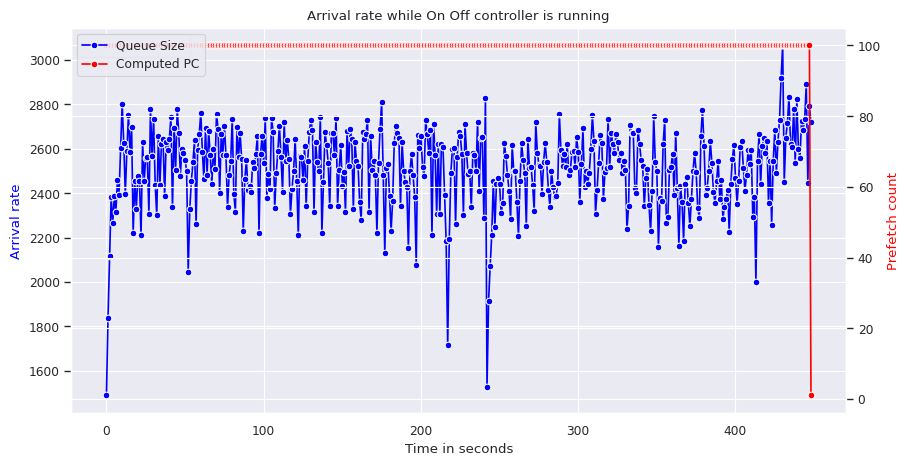

In [8]:
# Sort the dataframe based on 'QUEUE_SIZE' column in descending order
df_sorted = df.sort_values(by='QUEUE_SIZE', ascending=False)

# Plot the data
sns.set_style("darkgrid")
sns.set_context("paper")

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Plotting the queue size line
sns.lineplot(x=df_sorted.index, y='ARRIVAL_RATE', data=df_sorted, ax=ax1, marker='o', color='blue', label='Queue Size')

# Plotting the computed PC line on the secondary y-axis
sns.lineplot(x=df_sorted.index, y='PC_COMPUTED', data=df_sorted, ax=ax2, marker='o', color='red', label='Computed PC')

ax1.set_xlabel('Time in seconds')
ax1.set_ylabel('Arrival rate', color='blue')
ax2.set_ylabel('Prefetch count', color='red')

plt.title('Arrival rate while On Off controller is running')

# Adjusting the legend to display both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
